In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [3]:
train_path = r'D:\university\Thesis\secondary dataset\archive_2\1training'
test_path = r'D:\university\Thesis\secondary dataset\archive_2\2testing'
val_path = r'D:\university\Thesis\secondary dataset\archive_2\3vali'

daisy


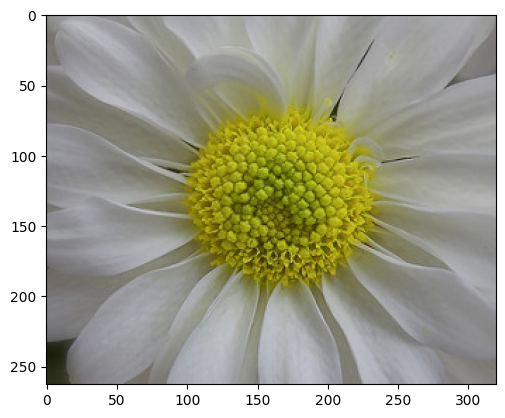

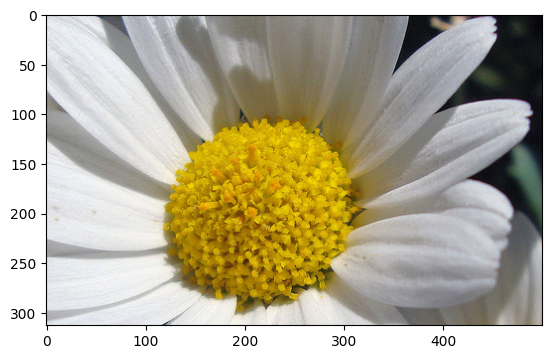

dandelion


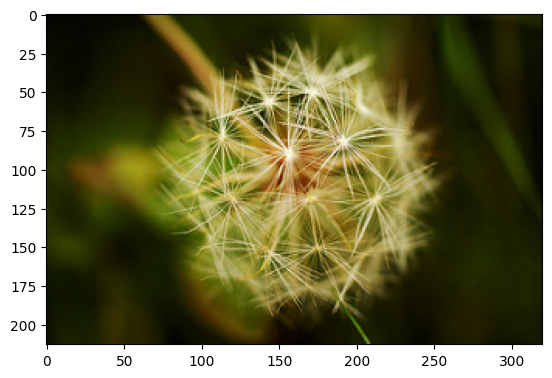

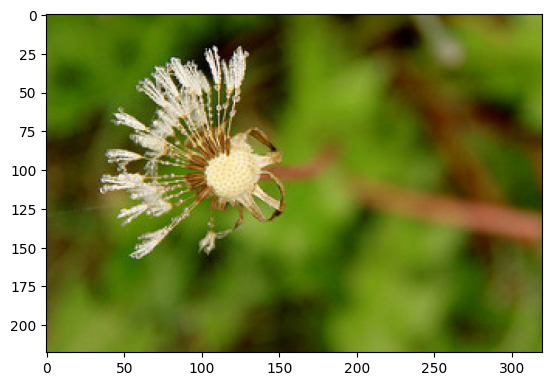

rose


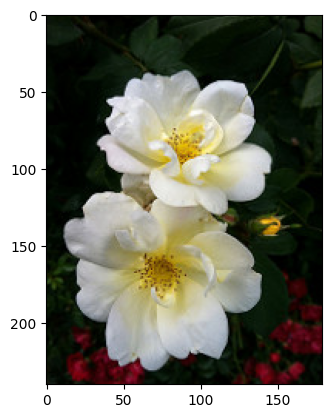

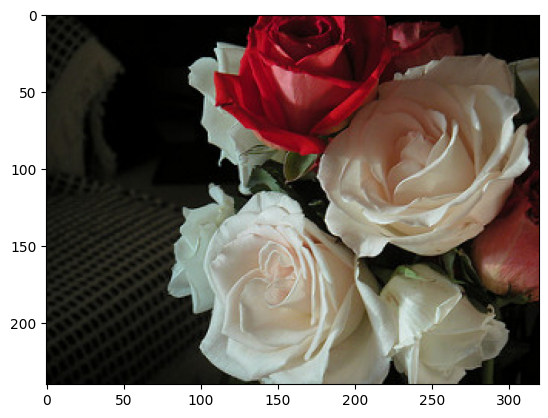

sunflower


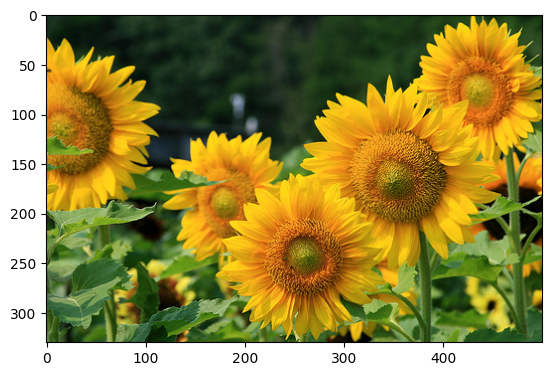

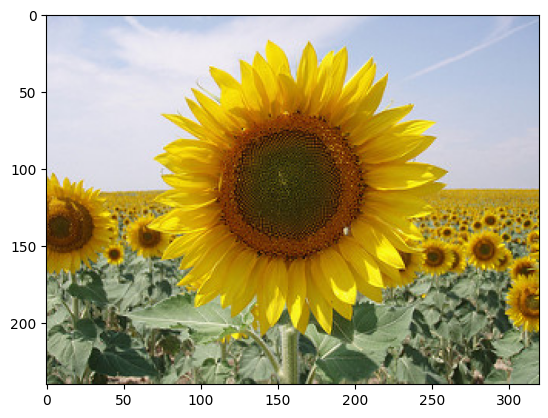

tulip


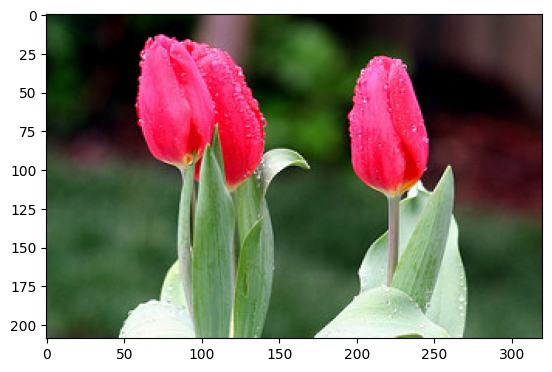

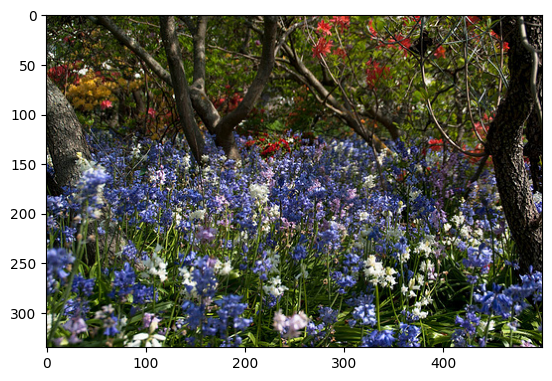

In [4]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [5]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [6]:
size = (250,250)

In [7]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [8]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [9]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [10]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2,
                                 vertical_flip=True,
                                 horizontal_flip=True,
                                 shear_range=0.2,
                                 rotation_range=20,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 1,
                                          class_mode = class_mode)
    return classes

In [11]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 3235 images belonging to 5 classes.
Found 629 images belonging to 5 classes.
Found 453 images belonging to 5 classes.


In [12]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [13]:
train_class.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [14]:
a = train_class.class_indices

In [15]:
y_train.shape,y_test.shape,y_val.shape

((3235,), (629,), (453,))

In [16]:
vgg2 = VGG16(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False) 

In [17]:
tf.keras.backend.clear_session()

In [18]:
#x
for layer in vgg2.layers:
    layer.trainable = False

x = Flatten()(vgg2.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
#x = Dense(128, activation='relu')(x)
#x = Dropout(0.25)(x)
#x = Dense(256, activation='relu')(x)
#x = Dropout(0.25)(x)
prediction = Dense(5, activation='softmax')(x)

model2 = Model(inputs=vgg2.input, outputs=prediction)
model2.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import datetime

In [20]:
learn_control = ReduceLROnPlateau(monitor='accuracy', patience=5,
                                  verbose=0,factor=0.1, min_lr=1e-7)
earlyStopping = EarlyStopping(monitor='accuracy', patience=5, verbose=0, mode='max')
mcp_save = ModelCheckpoint(r'D:\university\Thesis\final\Flower kath golap\saved model\model1_mcp.hdf5', save_best_only=True, monitor='val_loss', mode='min')

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [21]:
model2.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [22]:
tf.keras.backend.clear_session()

In [23]:
# Fit
history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30,batch_size =1,shuffle=True)

Epoch 1/30
3235/3235 [==============================] - 92s 17ms/step - loss: 1.1046 - accuracy: 0.6491 - val_loss: 0.6763 - val_accuracy: 0.7550
Epoch 2/30
3235/3235 [==============================] - 55s 17ms/step - loss: 0.6088 - accuracy: 0.7938 - val_loss: 0.6780 - val_accuracy: 0.7660
Epoch 3/30
3235/3235 [==============================] - 56s 17ms/step - loss: 0.4699 - accuracy: 0.8470 - val_loss: 0.7032 - val_accuracy: 0.7638
Epoch 4/30
3235/3235 [==============================] - 56s 17ms/step - loss: 0.4080 - accuracy: 0.8547 - val_loss: 0.8276 - val_accuracy: 0.7219
Epoch 5/30
3235/3235 [==============================] - 56s 17ms/step - loss: 0.3228 - accuracy: 0.8937 - val_loss: 0.7986 - val_accuracy: 0.7859
Epoch 6/30
3235/3235 [==============================] - 56s 17ms/step - loss: 0.2738 - accuracy: 0.9104 - val_loss: 0.8844 - val_accuracy: 0.7925
Epoch 7/30
3235/3235 [==============================] - 56s 17ms/step - loss: 0.2731 - accuracy: 0.9138 - val_loss: 1.1731 -

In [24]:
model2.save(r'D:\university\Thesis\secondary dataset\save model\model2.hdf5')

In [26]:
prediction2 = model2.predict(x_test) #1
prediction2_1 = np.argmax(prediction2,axis=1) #1
accuracy2 = accuracy_score(y_test, prediction2_1) #1
print('Accuracy Score for model1 = ', accuracy2) #1

Accuracy Score for model1 =  0.8056206088992974


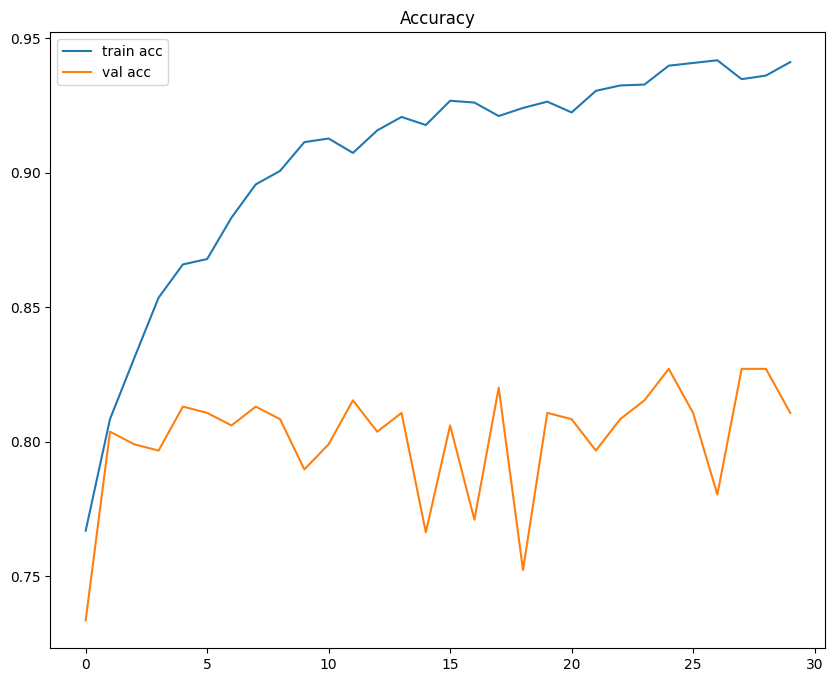

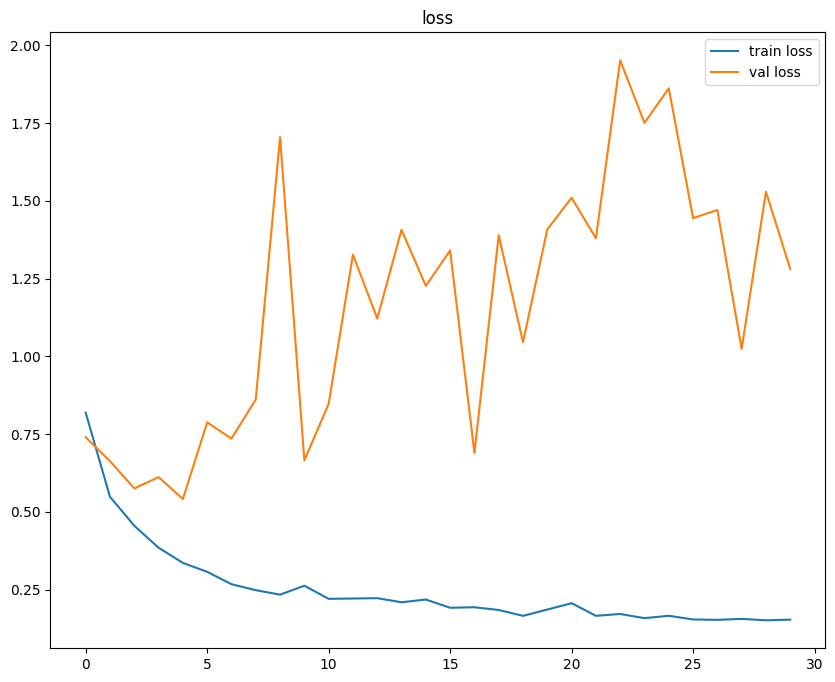

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.title('loss')
plt.show()

In [ ]:
#sdir=r'drive/My Drive/HAZIQ/TESTTEST/MODELTEST/'
#flist=os.listdir(sdir)
#test_img=random.choice(flist)
#test_img=os.path.join(sdir, test_img)